# Part II - (Prosper Loan Dataset Presentation)
## by (Chidubem Anyali)



## Investigation Overview


On getting a hold of this dataset, i imagined what my stakeholder would want to see from the dataset, which is the benchmark for the overall goal of the analysis. The overall goals for this analysis is to discover what factors affects the earnings of the company and also affect the interest paid by customers(borrowers). The key insights derived are:

1. We have a larger number of borrowers with verifiable income
2. The higher the risk for giving out loans, the higher the income of the company.
3. A greater portion of borrowers take loan for debt consolidation
4. The higher the money borrowed, the higher the monthly loan payment made by the borrower.
5. A larger proportion of borrowers earn between 25,000 and 74,999.
6. A greater portion of the loans are taken on a 36 months term

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [4]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')


This dataset has 113937 rows and 81 columns. The variables tha i will be using to support my investigation are: Income Verifiable, Listing Category, Income Range, Prosper Rating, Term of Loan, Borrower APR, Loan Status, Loan Original Amount, Estimated Effective Yield, Monthly Loan Payment.

## (Visualization 1)



The chart below shows that there is a positive relaionship between the loan original amount and monthly loan payment. The higher the amount borrowed, the higher the monthly loan repayment by the borrowers.


Text(0, 0.5, 'monthly loan payment')

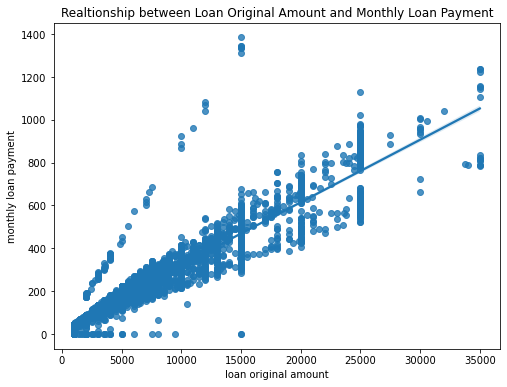

In [5]:
np.random.seed(1)
df_new = df.sample(5000)

plt.figure(figsize=(8,6))

sb.regplot(data = df_new, x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment');
plt.title('Realtionship between Loan Original Amount and Monthly Loan Payment')
plt.xlabel('loan original amount')
plt.ylabel('monthly loan payment')

## (Visualization 2)
In the chart below, i get to realize that Prosper Loan Company charges the interest on loan based on the risk involved with the borrower. The higher the rating given to a customer, the lower the risk involved in getting the money back. More reason why borrowers with rating AA makes a lower yield for the company, because there is a high level of trust. Compared to those with rating HR(which is the least rating) that makes the highest yield for the company, because of the risk involved. In summary, the higher the risk, the higher the earnings and vice versa.

Text(0, 0.5, 'estimated effective yield')

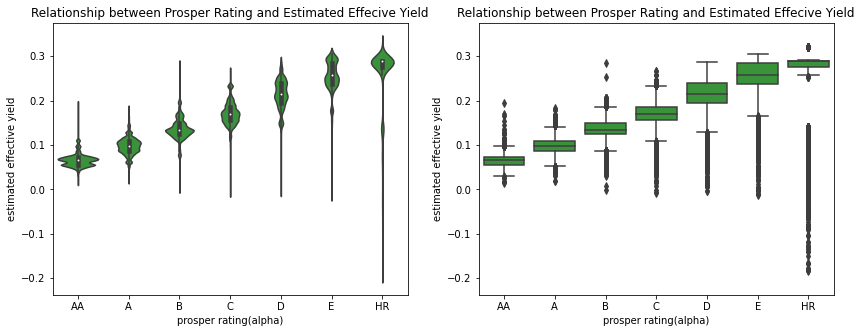

In [6]:
#importing a dictionary that will help change the data type for prosper rating to a categorical data type
from pandas.api.types import CategoricalDtype

#let's arrange the rating from the highest rating to the lowest rating
prosper_rating = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
pros_ord = CategoricalDtype(categories = prosper_rating, ordered=True)
df['ProsperRating (Alpha)']= df['ProsperRating (Alpha)'].astype(pros_ord)

plt.figure(figsize = [14, 5])
base_color = sb.color_palette()[2]

# LEFT plot: violin plot
plt.subplot(1, 2, 1)
#Let's return the axes object
ax1 = sb.violinplot(data=df, x='ProsperRating (Alpha)', y='EstimatedEffectiveYield', color=base_color)
plt.title('Relationship between Prosper Rating and Estimated Effecive Yield')
plt.xlabel('prosper rating(alpha)')
plt.ylabel('estimated effective yield')


# RIGHT plot: box plot
plt.subplot(1, 2, 2)
sb.boxplot(data=df, x='ProsperRating (Alpha)', y='EstimatedEffectiveYield', color=base_color)
plt.ylim(ax1.get_ylim());
plt.title('Relationship between Prosper Rating and Estimated Effecive Yield')
plt.xlabel('prosper rating(alpha)')
plt.ylabel('estimated effective yield')

## (Visualization 3)

This chart sums it up as it affects both the borrowers and the loan company(Prosper Loan). It talks about the Borrower Annual Percentage rate which reflects the portion of the loan that the borrower pays back on a monthly basis. And the Estimated Effective Yield which reflects the income after deductibles that the company(Prosper Loan) gets back. And the term of loan which is how long the loan was taken. These three variables are positively related. An increase in one of the variable is an increase in the other variables. 

Text(0, 0.5, 'estimated effective yield')

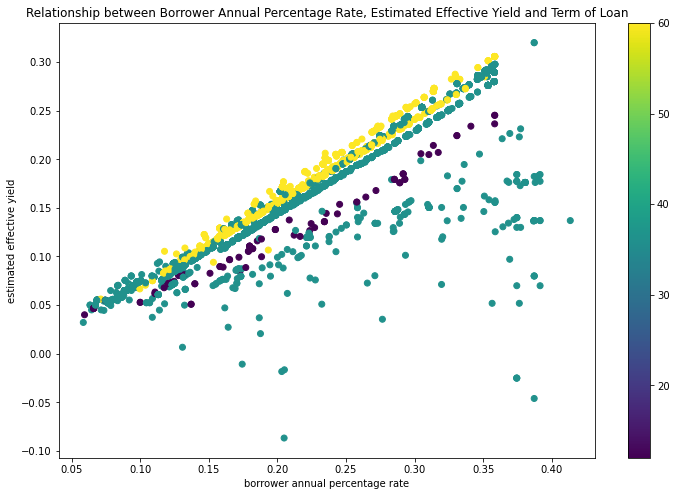

In [7]:
plt.figure(figsize=(12,8))
plt.scatter(data = df_new, x='BorrowerAPR', y='EstimatedEffectiveYield', c='Term')
cbar = plt.colorbar()
plt.title('Relationship between Borrower Annual Percentage Rate, Estimated Effective Yield and Term of Loan')
plt.xlabel('borrower annual percentage rate')
plt.ylabel('estimated effective yield')


### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Prosper_Loan_Part2(1).ipynb --to slides --post serve --no-input --no-prompt
